In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
dat = pd.DataFrame(boston.data)
dat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dat.columns = boston.feature_names
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dat['Price'] = boston.target
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


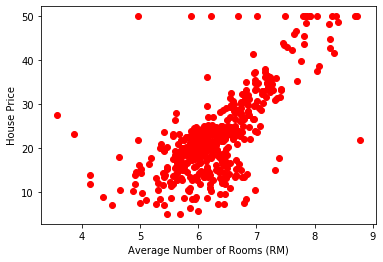

In [9]:
from matplotlib import pyplot as plt
plt.scatter(dat['RM'],dat['Price'], color='r')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')
plt.show()

In [10]:
import sklearn.model_selection 

X = dat['RM']
Y = dat['Price']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [11]:
X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#the intercept:
print(lm.intercept_)
#the slope:
print(lm.coef_)

[-34.41739096]
[[9.06976014]]


In [14]:
Y_pred = lm.predict(X_test)

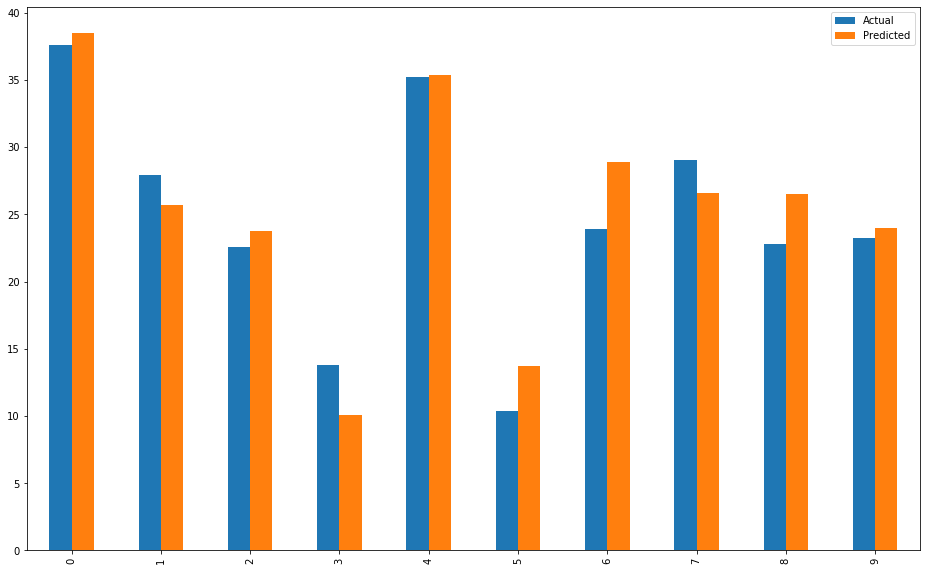

In [15]:
Output = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df1 = Output.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

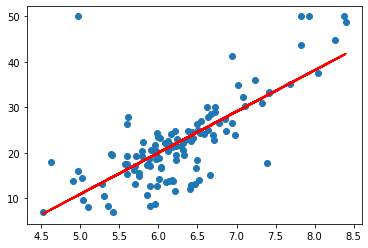

In [16]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [17]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = np.mean ((forecast-actual)**2)      #MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE                   
    return({'me':me, 'mae': mae, 'mse':mse, 'rmse':rmse})

forecast_accuracy(Y_pred, Y_test)

{'me': 0.19893030499139885,
 'mae': 3.9352380033262495,
 'mse': 38.39960082194633,
 'rmse': 6.1967411453074535}

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("R2 (on testing data) : {:.2}".format(r2))

R2 (on testing data) : 0.53


In [19]:
r2= lm.score(X_test, Y_test)
print("R2 (on testing data) : {:.2}".format(r2))

R2 (on testing data) : 0.53


In [20]:
import statsmodels.api as sm

In [21]:
## Without a constant
model = sm.OLS(Y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              3423.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):                   1.52e-191
Time:                        13:14:09   Log-Likelihood:                         -1312.3
No. Observations:                 379   AIC:                                      2627.
Df Residuals:                     378   BIC:                                      2631.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6677      0.063     58.506      0.000       3.544       3.791
==============================================================================
Omnibus:                       51.363   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.511
Skew:                           0.839   Prob(JB):                     2.00e-18
Kurtosis:                       4.532   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

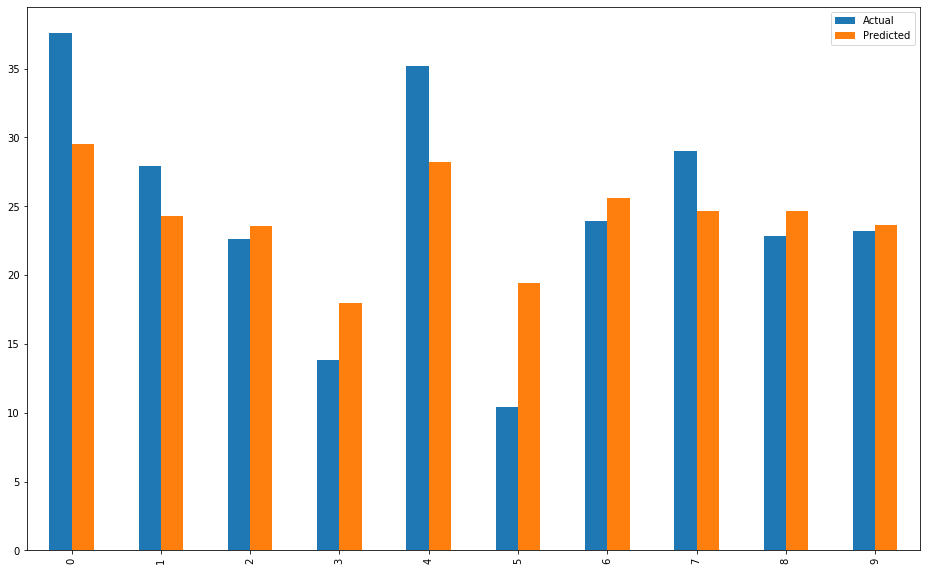

In [22]:
from matplotlib import pyplot as plt
Y_pred = model.predict(X_test)
Output = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df1 = Output.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [23]:
forecast_accuracy(Y_pred, Y_test)

{'me': 0.8273430448827112,
 'mae': 7.06507156401176,
 'mse': 90.27993917697985,
 'rmse': 9.501575615495561}

In [24]:
r2 = r2_score(Y_test, Y_pred)
print("R2 (on testing data) : {:.2}".format(r2))

R2 (on testing data) : 0.33


In [25]:
import sklearn.model_selection 

X = dat['RM']
Y = dat['Price']

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 5)
X_train = X_train.values.reshape(-1,2)
Y_train = Y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,2)
Y_test = Y_test.values.reshape(-1,1)


# Note the difference in argument order
model = sm.OLS(Y_train, X_train) ## sm.OLS(output, input)

model = model.fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     329.4
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           2.35e-53
Time:                        13:14:19   Log-Likelihood:                -1260.6
No. Observations:                 379   AIC:                             2525.
Df Residuals:                     377   BIC:                             2533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.4174      3.165    -10.876      0.000     -40.640     -28.195
x1             9.0698      0.500     18.150      0.000       8.087      10.052
==============================================================================
Omnibus:                       47.338   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.380
Skew:                           0.408   Prob(JB):                     3.42e-46
Kurtosis:                       6.549   Cond. No.                         59.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

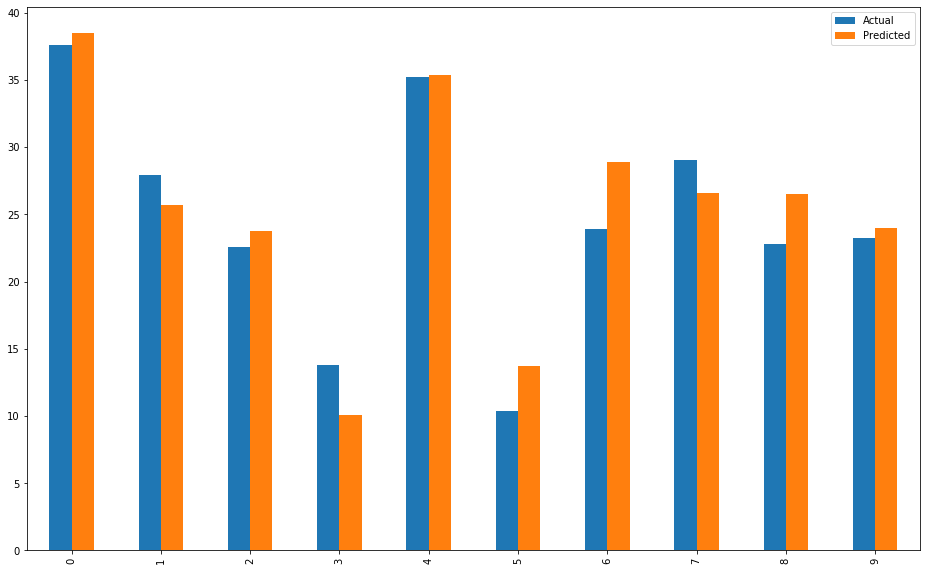

In [26]:
from matplotlib import pyplot as plt
X_test = sm.add_constant(X_test)
Y_pred = model.predict(X_test)
Output = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df1 = Output.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [27]:
forecast_accuracy(Y_pred, Y_test)

{'me': 0.19893030499141784,
 'mae': 8.446203331193555,
 'mse': 125.71788209532211,
 'rmse': 11.212398587961548}

In [28]:
r2 = r2_score(Y_test, Y_pred)
print("R2 (on testing data) : {:.2}".format(r2))

R2 (on testing data) : 0.53


In [29]:
X = boston.data
Y = boston.target
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [30]:
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [31]:
lm.fit(X_train,Y_train)
y_predicted = lm.predict(X_test)

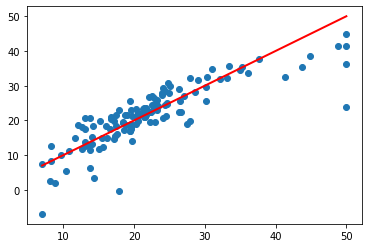

In [32]:
plt.scatter(Y_test, y_predicted)
plt.plot([Y_test.min(),Y_test.max()], [[Y_test.min()], [Y_test.max()]], color ='r', linewidth =2)

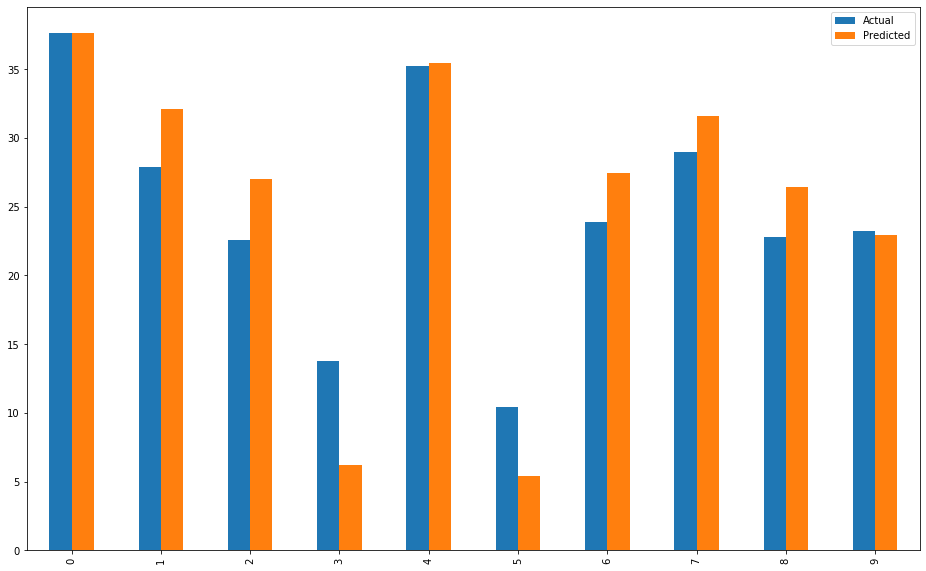

In [33]:
Output = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_predicted.flatten()})
df1 = Output.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [34]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = np.mean ((forecast-actual)**2)      #MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE                   
    return({'me':me, 'mae': mae, 'mse':mse, 'rmse':rmse})

forecast_accuracy(y_predicted, Y_test)

{'me': -0.47313826074083576,
 'mae': 3.2900183526885516,
 'mse': 24.274608311687924,
 'rmse': 4.926926862831224}

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_predicted)
print("R2 (on testing data) : {:.2}".format(r2))

R2 (on testing data) : 0.71


In [36]:
X = dat['RM'].values.reshape(-1,1)
Y = dat['Price'].values.reshape(-1,1)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [38]:
transformer.fit(X)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [39]:
X_ = transformer.transform(X)

In [40]:
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [41]:
print(X_)

[[ 6.575    43.230625]
 [ 6.421    41.229241]
 [ 7.185    51.624225]
 ...
 [ 6.976    48.664576]
 [ 6.794    46.158436]
 [ 6.03     36.3609  ]]


In [42]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 5)
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [43]:
model = LinearRegression().fit(X_train, Y_train)

In [44]:
y_predicted = model.predict(X_test)

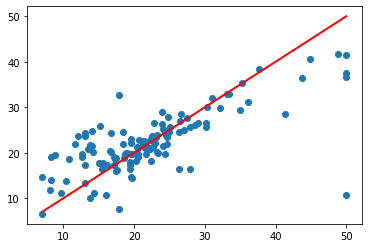

In [45]:
plt.scatter(Y_test, y_predicted)
plt.plot([Y_test.min(),Y_test.max()], [[Y_test.min()], [Y_test.max()]], color ='r', linewidth =2)

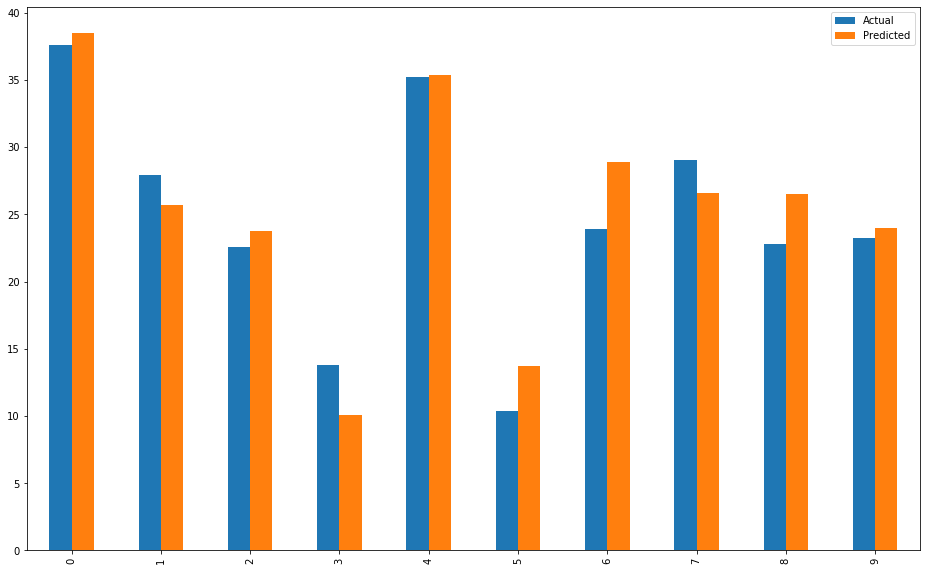

In [46]:
_

In [47]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = np.mean ((forecast-actual)**2)      #MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE                   
    return({'me':me, 'mae': mae, 'mse':mse, 'rmse':rmse})

forecast_accuracy(y_predicted, Y_test)

{'me': 0.19893030499139885,
 'mae': 3.9352380033262495,
 'mse': 38.39960082194633,
 'rmse': 6.1967411453074535}

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_predicted)
print("R2 (on testing data) : {:.2}".format(r2))

R2 (on testing data) : 0.53
